In [ ]:
# keras - 레이어를 층층이 쌓아서 모델을 생성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

In [3]:
#  fashion_mnist - 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


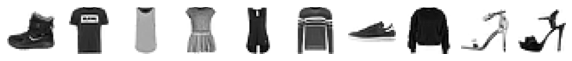

In [6]:
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [7]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [9]:
train_input[0].shape

(28, 28)

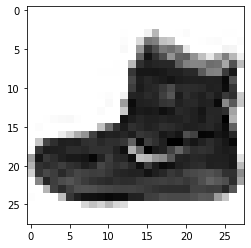

In [10]:
plt.imshow(train_input[0], cmap='gray_r')

In [11]:
train_input.shape

(60000, 28, 28)

In [12]:
train_input[0].shape

(28, 28)

In [13]:
# Dense 레이어에 입력하기위해 정렬
x_train = train_input.reshape(60000, 28*28)
x_test = test_input.reshape(10000, 28*28)
y_train = train_target
y_test = test_target

In [14]:
x_train[0].shape

(784,)

In [15]:
# Multi class classification 을 위해 원핫 인코딩
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
# logisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8412

In [20]:
# deep learning

In [21]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))  # 은닉층 - relu
model.add(Dense(56, activation='relu'))
model.add(Dense(10, activation='softmax')) # softmax - multi classification
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 56)                7224      
                                                                 
 dense_2 (Dense)             (None, 10)                570       
                                                                 
Total params: 108,274
Trainable params: 108,274
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
x_train.shape

(60000, 784)

In [24]:
y_train_oh.shape

(60000, 10)

In [56]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
hist = model.fit(x_train.astype(float), y_train_oh, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
2400/2400 [==============================] - 12s 4ms/step - loss: 1.6785 - accuracy: 0.7350 - val_loss: 0.5711 - val_accuracy: 0.8049
Epoch 2/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.5484 - accuracy: 0.8098 - val_loss: 0.5125 - val_accuracy: 0.8193
Epoch 3/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4791 - accuracy: 0.8307 - val_loss: 0.4569 - val_accuracy: 0.8430
Epoch 4/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4608 - accuracy: 0.8371 - val_loss: 0.4988 - val_accuracy: 0.8255
Epoch 5/50
2400/2400 [==============================] - 10s 4ms/step - loss: 0.4329 - accuracy: 0.8479 - val_loss: 0.4325 - val_accuracy: 0.8467
Epoch 6/50
2400/2400 [==============================] - 10s 4ms/step - loss: 0.4167 - accuracy: 0.8530 - val_loss: 0.4385 - val_accuracy: 0.8557
Epoch 7/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4092 - accuracy: 0.8565 - val_loss: 0.4563 - val_accura

In [26]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.8644


[0.4788486361503601, 0.8644000291824341]

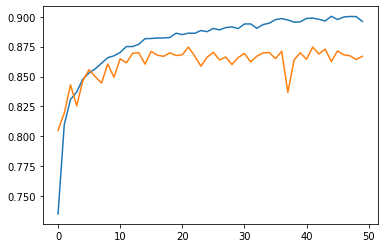

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
# https://davinci-ai.tistory.com/29

In [27]:
# CNN - 합성곱 신경망(Convolutional Neural Network) 
## 주로 이미지를 사용한 딥러닝 네트워크 방식에서 사용됩니다

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FckMfvx%2FbtqCNGi5uBJ%2F1SWyWAUWX9zdQ7Ij4U3fQk%2Fimg.png'>

In [28]:
# 컨볼루션 레이어(Convolution Layer) 합성곱 래아어
## 합성곱은 특정 크기를 가진 필터(Filter, Kernel)를 일정 간격(Stride)으로 이동하면서 입력 데이터에 연산을 적용합니다.

<img src='https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif' height=400 display:inline>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FsSowL%2FbtqCLeODqbH%2F0VNYdYkafga04UZhgxliv0%2Fimg.png' height=300>

In [ ]:
# 필터
## 어떠한 필터(Filter)를 사용하느냐에 따라 찾을 수 있는 이미지의 특징이 달라집니다.
## 학습을 통해서 점차 특징을 잘 찾는 필터가 생성되도록 합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbMXMXe%2FbtqCeuEfwDQ%2FkrWOp0cFiNYKnln6kqPLS0%2Fimg.png'>


In [60]:
# 풀링(Pooling) - 은 합성곱에 의해 얻어진 Feature map으로부터 값을 샘플링해서 정보를 압축하는 과정을 의미합니다.

<img src='https://codetorial.net/tensorflow/_images/convolutional_neural_network_03.png' height=400>

In [29]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [30]:
# 샘플수, 행, 열, 채널 수 - 4D 텐서
x_train_cov = train_input.reshape(60000, 28, 28, 1)
x_test_cov = test_input.reshape(10000, 28, 28,1)

In [58]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten()) # 분류를 위해 입력 데이터를 1차원으로 변환
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 100)              

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdAL0w4%2FbtqCd1WEYoi%2FypDer6gvLoSCJnPM9QdDsk%2Fimg.png' height=300>

In [32]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [33]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 37s 6ms/step - loss: 0.5922 - accuracy: 0.8189 - val_loss: 0.3484 - val_accuracy: 0.8711
Epoch 2/10
4800/4800 [==============================] - 27s 6ms/step - loss: 0.3729 - accuracy: 0.8660 - val_loss: 0.3318 - val_accuracy: 0.8783
Epoch 3/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3316 - accuracy: 0.8792 - val_loss: 0.3158 - val_accuracy: 0.8811
Epoch 4/10
4800/4800 [==============================] - 26s 6ms/step - loss: 0.3082 - accuracy: 0.8878 - val_loss: 0.2945 - val_accuracy: 0.8903
Epoch 5/10
4800/4800 [==============================] - 26s 6ms/step - loss: 0.2969 - accuracy: 0.8948 - val_loss: 0.3489 - val_accuracy: 0.8752
Epoch 6/10
4800/4800 [==============================] - 26s 6ms/step - loss: 0.2841 - accuracy: 0.8970 - val_loss: 0.3195 - val_accuracy: 0.8921
Epoch 7/10
4800/4800 [==============================] - 26s 5ms/step - loss: 0.2762 - accuracy: 0.8997 - val_loss: 0.3189 - val_ac

In [34]:
model.evaluate(x_test_cov, y_test_oh)

313/313 [==============================] - 2s 5ms/step - loss: 0.3659 - accuracy: 0.8898


[0.36594054102897644, 0.8898000121116638]

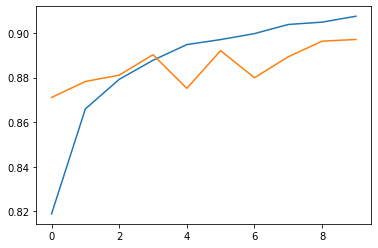

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [37]:
from tensorflow.keras import utils

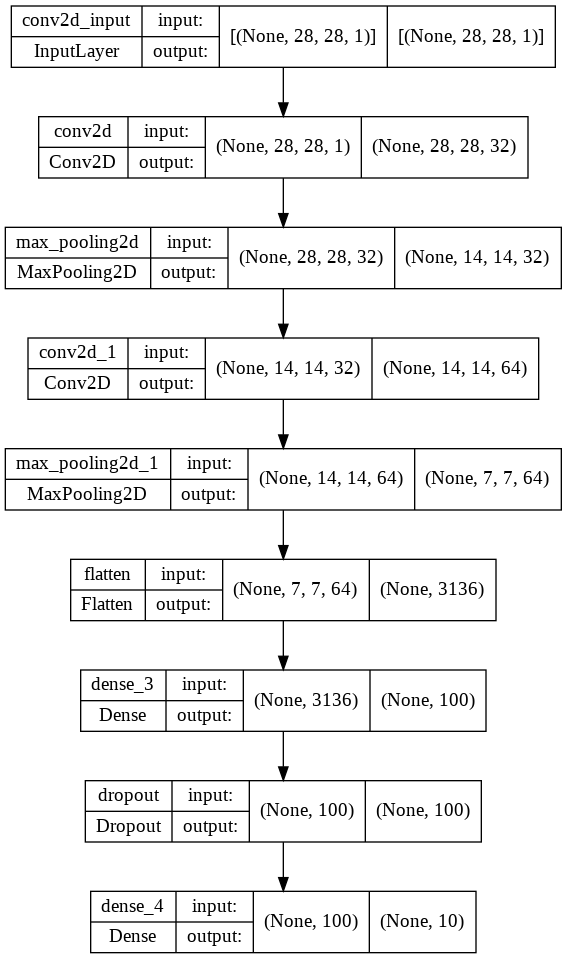

In [38]:
# 모델 구성 시각화
utils.plot_model(model, show_shapes = True)

In [39]:
# filter print

In [40]:
model.layers

In [41]:
model.layers[0]

In [64]:
# 필터 가중치
model.layers[0].weights[0]

<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.03922924,  0.12753077,  0.12323327,  0.11679487,
          -0.12158874, -0.10812014, -0.04058325,  0.00437705,
          -0.11033367,  0.12548612, -0.03660569, -0.12402635,
           0.11162649,  0.05927899, -0.04814073,  0.06156592,
           0.12256806,  0.11193328, -0.05494399,  0.06680812,
          -0.01366565,  0.13416182,  0.0274051 ,  0.01782176,
          -0.08295235, -0.13569708, -0.05661226, -0.08944143,
          -0.11143772,  0.04398787, -0.05139646,  0.11619361]],

        [[-0.09030496,  0.02504708,  0.13142873, -0.12320808,
           0.13459377,  0.07986084,  0.09978734, -0.04093953,
          -0.12205089,  0.12743847, -0.01814044, -0.05236378,
          -0.1312079 ,  0.04339427, -0.12448505,  0.01275499,
          -0.10531448,  0.02699943, -0.11949975, -0.11508345,
           0.05946009,  0.01073073,  0.07757911, -0.06757146,
          -0.06635186,  0.08423299, -0.04625243, -0.12

In [43]:
conv1 = model.layers[0]
conv1_weights = conv1.weights[0].numpy()

In [44]:
conv1_weights.shape

(3, 3, 1, 32)

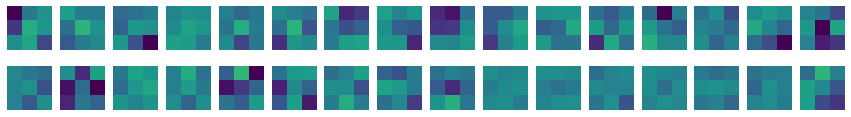

In [45]:
# 필터별 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv1_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

In [46]:
# layer output print

In [47]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [48]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [49]:
from tensorflow.keras.models import Model

In [50]:
# 입력값과 출력값을 넣어 모델생성
conv_acti = Model(model.input, model.layers[0].output)

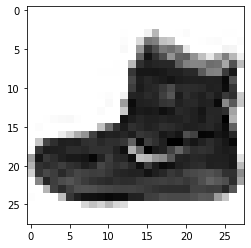

In [51]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [52]:
inputs = train_input[0].reshape(-1, 28, 28,1)
feature_maps = conv_acti.predict(inputs)

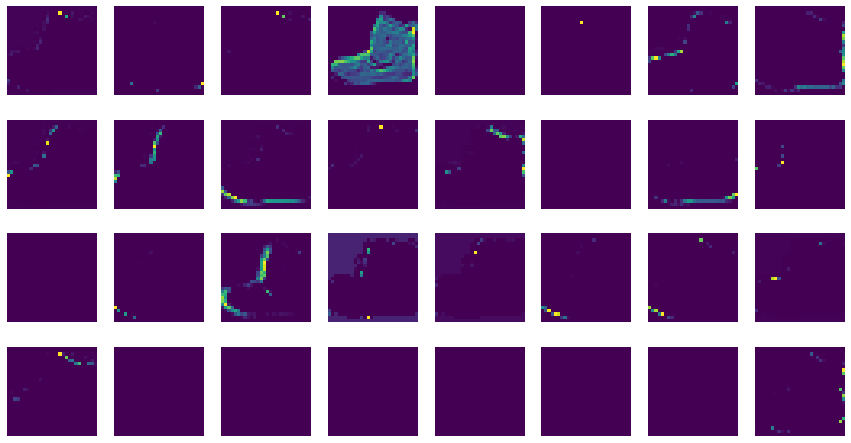

In [53]:
# 피쳐 시각화
fig, axs = plt.subplots(4,8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:, i*8+j])
    axs[i,j].axis('off')
    
plt.show()